<a href="https://colab.research.google.com/github/Firyal-16/UAS-PPh-Badan/blob/main/UAS_PPh_Badan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tolong buatkan code pyhton 3 dan buatkan analisis datanya berupa grafik yang berwarna, serta column analisis secara komprehensif dan valid

Here is all the data you need:
"combined_data.csv"

## Data loading

### Subtask:
Load the "combined_data.csv" file.


**Reasoning**:
I need to load the dataframe and show the first 5 rows and the shape of the dataframe.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('combined_data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'combined_data.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir,pendapatan,beban_operasional,penyusutan,skenario
0,2021,0.22,2023,2027,1000000000,600000000,50000000,normal
1,2022,0.22,2023,2027,1200000000,700000000,55000000,normal
2,2023,0.00,2023,2027,1300000000,750000000,60000000,tax_holiday
3,2024,0.00,2023,2027,1400000000,800000000,62000000,tax_holiday
4,2025,0.00,2023,2027,1500000000,850000000,65000000,tax_holiday


(8, 8)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types, and distributions of key variables. Determine the shape of the data and the correlation between variables.


**Reasoning**:
Examine data types, missing values, descriptive statistics, distributions, and correlations to understand the data.



tahun                  int64
tax_rate             float64
tax_holiday_awal       int64
tax_holiday_akhir      int64
pendapatan             int64
beban_operasional      int64
penyusutan             int64
skenario              object
dtype: object
tahun                0
tax_rate             0
tax_holiday_awal     0
tax_holiday_akhir    0
pendapatan           0
beban_operasional    0
penyusutan           0
skenario             0
dtype: int64
tahun                0.0
tax_rate             0.0
tax_holiday_awal     0.0
tax_holiday_akhir    0.0
pendapatan           0.0
beban_operasional    0.0
penyusutan           0.0
skenario             0.0
dtype: float64
            tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  \
count     8.00000  8.000000               8.0                8.0   
mean   2024.50000  0.082500            2023.0             2027.0   
std       2.44949  0.113861               0.0                0.0   
min    2021.00000  0.000000            2023.0             2027.0   
25

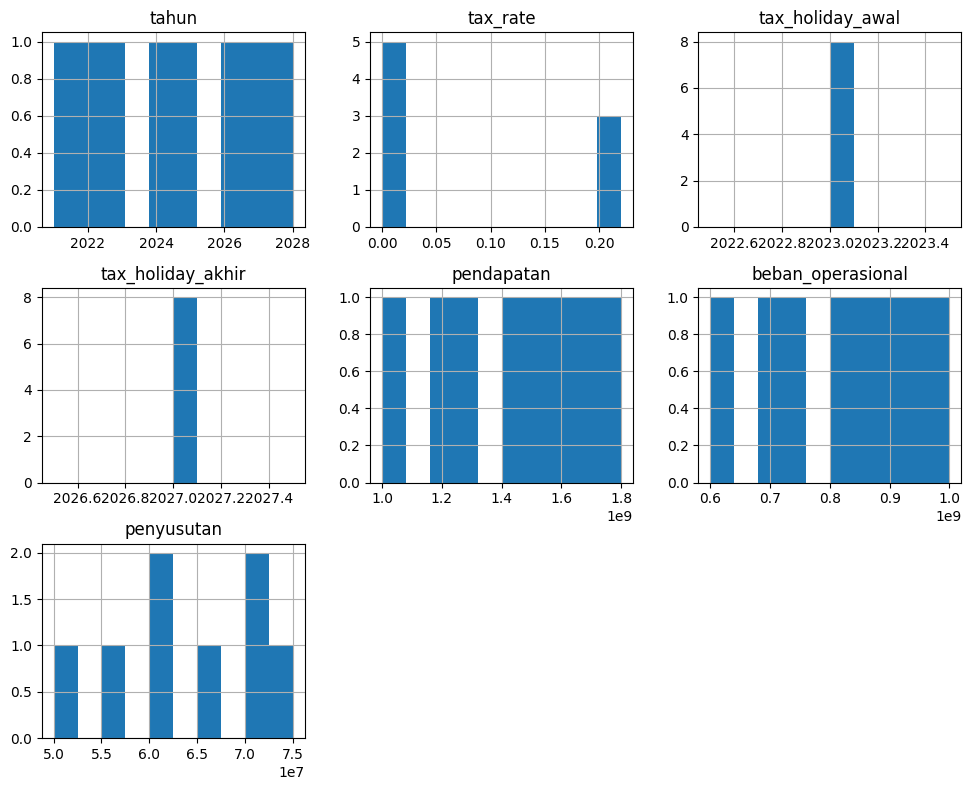

                      tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  \
tahun              1.000000 -0.281718               NaN                NaN   
tax_rate          -0.281718  1.000000               NaN                NaN   
tax_holiday_awal        NaN       NaN               NaN                NaN   
tax_holiday_akhir       NaN       NaN               NaN                NaN   
pendapatan         0.994135 -0.323153               NaN                NaN   
beban_operasional  0.994135 -0.323153               NaN                NaN   
penyusutan         0.993346 -0.348993               NaN                NaN   

                   pendapatan  beban_operasional  penyusutan  
tahun                0.994135           0.994135    0.993346  
tax_rate            -0.323153          -0.323153   -0.348993  
tax_holiday_awal          NaN                NaN         NaN  
tax_holiday_akhir         NaN                NaN         NaN  
pendapatan           1.000000           1.000000    0.996335

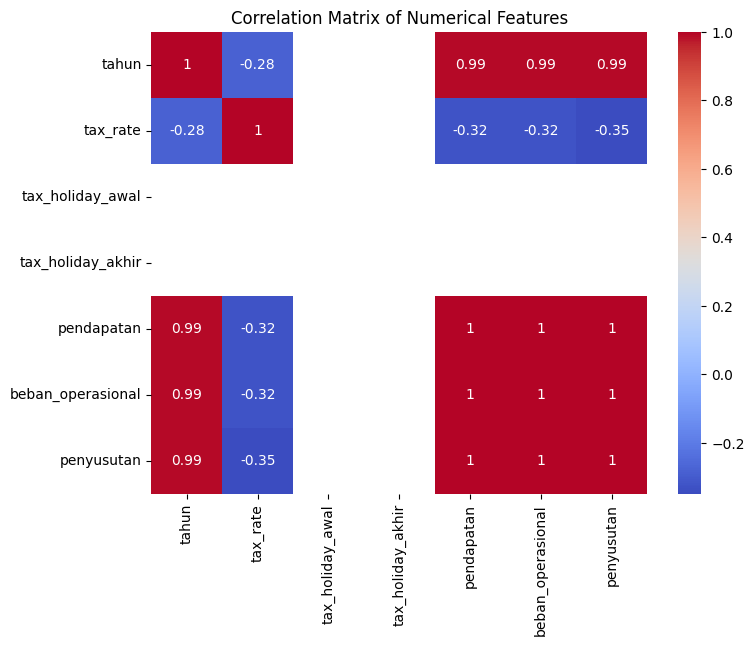

Unique values and frequencies for skenario:
skenario
tax_holiday    5
normal         3
Name: count, dtype: int64


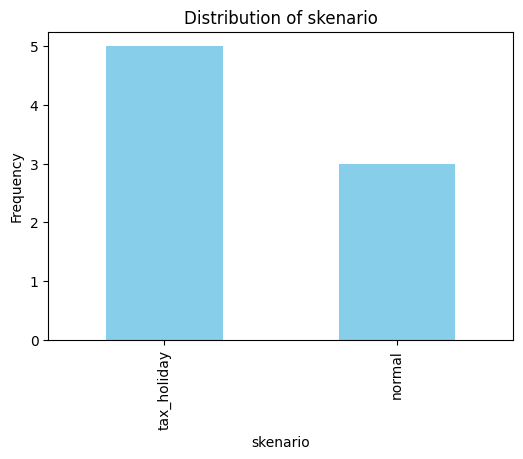

In [2]:
# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

# Descriptive statistics for numerical features
numerical_features = df.select_dtypes(include=['number'])
print(numerical_features.describe())

# Histograms for numerical features
import matplotlib.pyplot as plt
numerical_features.hist(figsize=(10, 8), bins=10)
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

# Heatmap for correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Examine categorical features
categorical_features = df.select_dtypes(include=['object'])
for column in categorical_features.columns:
    print(f"Unique values and frequencies for {column}:")
    print(categorical_features[column].value_counts())

    plt.figure(figsize=(6, 4))
    categorical_features[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Data cleaning

### Subtask:
Clean the data by handling potential outliers and ensuring data type consistency.


## Data wrangling

### Subtask:
Data Wrangling and Feature Creation


**Reasoning**:
Create a new 'profit' column by subtracting 'beban_operasional' and 'penyusutan' from 'pendapatan'.  This is a relevant feature for financial analysis.



In [3]:
# Calculate profit
df['profit'] = df['pendapatan'] - df['beban_operasional'] - df['penyusutan']

# Display the updated DataFrame
display(df.head())

,tahun,tax_rate,tax_holiday_awal,tax_holiday_akhir,pendapatan,beban_operasional,penyusutan,skenario,profit
0,2021,0.22,2023,2027,1000000000,600000000,50000000,normal,350000000
1,2022,0.22,2023,2027,1200000000,700000000,55000000,normal,445000000
2,2023,0.00,2023,2027,1300000000,750000000,60000000,tax_holiday,490000000
3,2024,0.00,2023,2027,1400000000,800000000,62000000,tax_holiday,538000000
4,2025,0.00,2023,2027,1500000000,850000000,65000000,tax_holiday,585000000


## Data analysis

### Subtask:
Analyze the data to gain insights.


**Reasoning**:
Calculate descriptive statistics, analyze correlations, explore the relationship between profit and scenario, and perform time series analysis of profit.



In [4]:
# Descriptive statistics
print(df.describe())

# Correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Profit by scenario
average_profit_by_scenario = df.groupby('skenario')['profit'].mean()
plt.figure(figsize=(6, 4))
average_profit_by_scenario.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Profit by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average Profit')
plt.show()

# Time series analysis
plt.figure(figsize=(10, 6))
for scenario in df['skenario'].unique():
    subset = df[df['skenario'] == scenario]
    plt.plot(subset['tahun'], subset['profit'], label=scenario)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Trend Over Time by Scenario')
plt.legend()
plt.grid(True)
plt.show()

            tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  \
count     8.00000  8.000000               8.0                8.0   
mean   2024.50000  0.082500            2023.0             2027.0   
std       2.44949  0.113861               0.0                0.0   
min    2021.00000  0.000000            2023.0             2027.0   
25%    2022.75000  0.000000            2023.0             2027.0   
50%    2024.50000  0.000000            2023.0             2027.0   
75%    2026.25000  0.220000            2023.0             2027.0   
max    2028.00000  0.220000            2023.0             2027.0   

         pendapatan  beban_operasional    penyusutan        profit  
count  8.000000e+00       8.000000e+00  8.000000e+00  8.000000e+00  
mean   1.437500e+09       8.187500e+08  6.362500e+07  5.551250e+08  
std    2.669270e+08       1.334635e+08  8.601287e+06  1.248959e+08  
min    1.000000e+09       6.000000e+08  5.000000e+07  3.500000e+08  
25%    1.275000e+09       7.375000e+08  5.

ValueError: could not convert string to float: 'normal'

**Reasoning**:
The previous code failed due to a `ValueError` when calculating the correlation matrix because the 'skenario' column is of object type.  I'll modify the code to exclude this column from the correlation analysis and to handle the error gracefully.  I will also refine the time series analysis to ensure correct plotting.



             tahun  tax_rate  tax_holiday_awal  tax_holiday_akhir  \
count      8.00000  8.000000               8.0                8.0   
unique         NaN       NaN               NaN                NaN   
top            NaN       NaN               NaN                NaN   
freq           NaN       NaN               NaN                NaN   
mean    2024.50000  0.082500            2023.0             2027.0   
std        2.44949  0.113861               0.0                0.0   
min     2021.00000  0.000000            2023.0             2027.0   
25%     2022.75000  0.000000            2023.0             2027.0   
50%     2024.50000  0.000000            2023.0             2027.0   
75%     2026.25000  0.220000            2023.0             2027.0   
max     2028.00000  0.220000            2023.0             2027.0   

          pendapatan  beban_operasional    penyusutan     skenario  \
count   8.000000e+00       8.000000e+00  8.000000e+00            8   
unique           NaN           

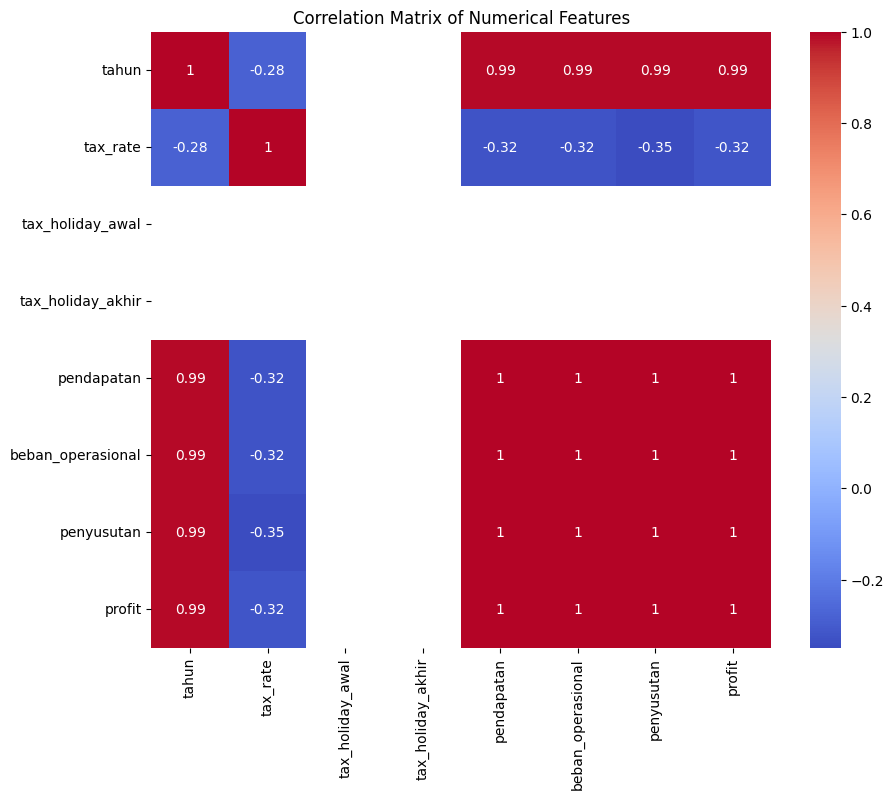

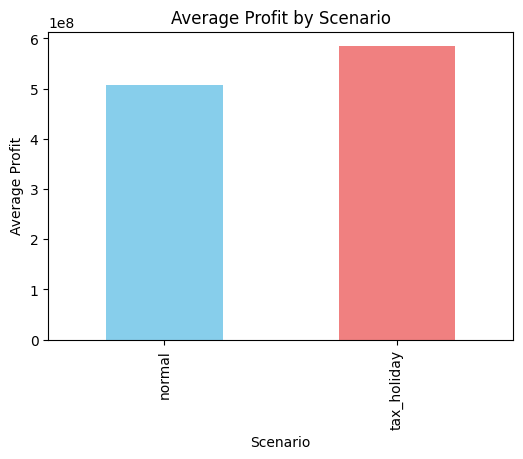

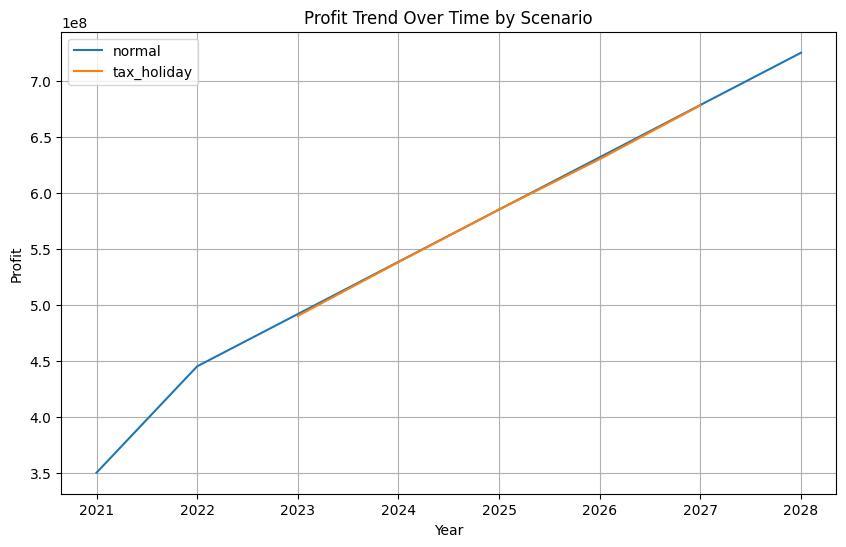

In [5]:
# Descriptive statistics
print(df.describe(include='all'))

# Correlation analysis (excluding non-numeric columns)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Profit by scenario
average_profit_by_scenario = df.groupby('skenario')['profit'].mean()
plt.figure(figsize=(6, 4))
average_profit_by_scenario.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Profit by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average Profit')
plt.show()

# Time series analysis (handling potential errors)
plt.figure(figsize=(10, 6))
for scenario in df['skenario'].unique():
    try:
        subset = df[df['skenario'] == scenario]
        plt.plot(subset['tahun'], subset['profit'], label=scenario)
    except Exception as e:
        print(f"Error plotting for scenario '{scenario}': {e}")
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Trend Over Time by Scenario')
plt.legend()
plt.grid(True)
plt.show()

## Data visualization

### Subtask:
Create visualizations to represent key findings from the data analysis.  Focus on colored charts that clearly communicate insights.


**Reasoning**:
Generate the required visualizations based on the analysis from the previous steps.  This includes a line plot of profit over time by scenario, a box plot of profit distribution by scenario, and a correlation heatmap of numerical features.



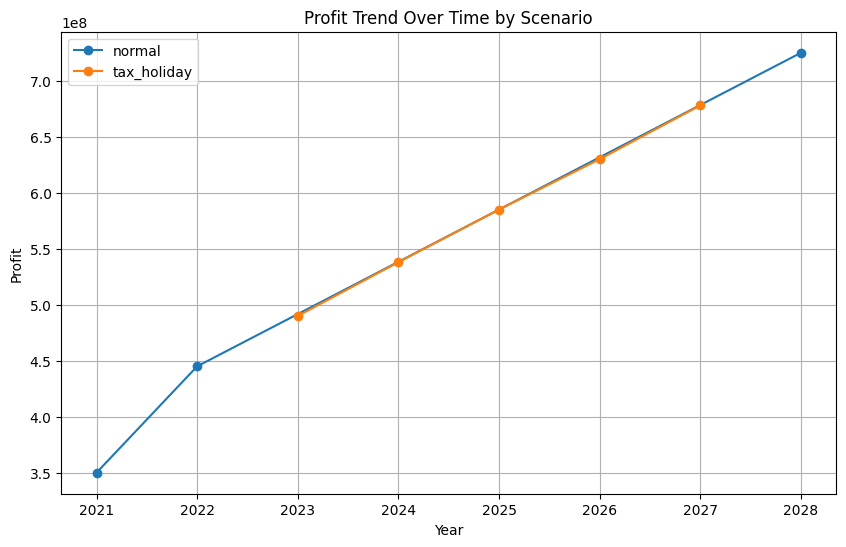

<ipython-input-6-134f1eacf226>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='skenario', y='profit', data=df, palette='Set2')


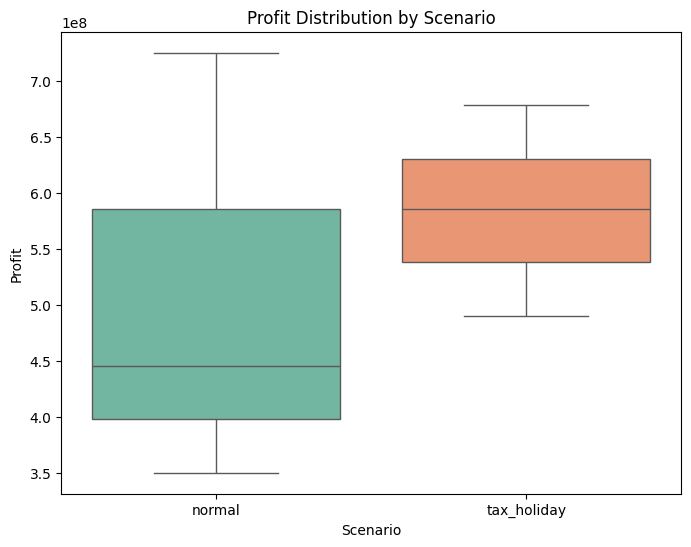

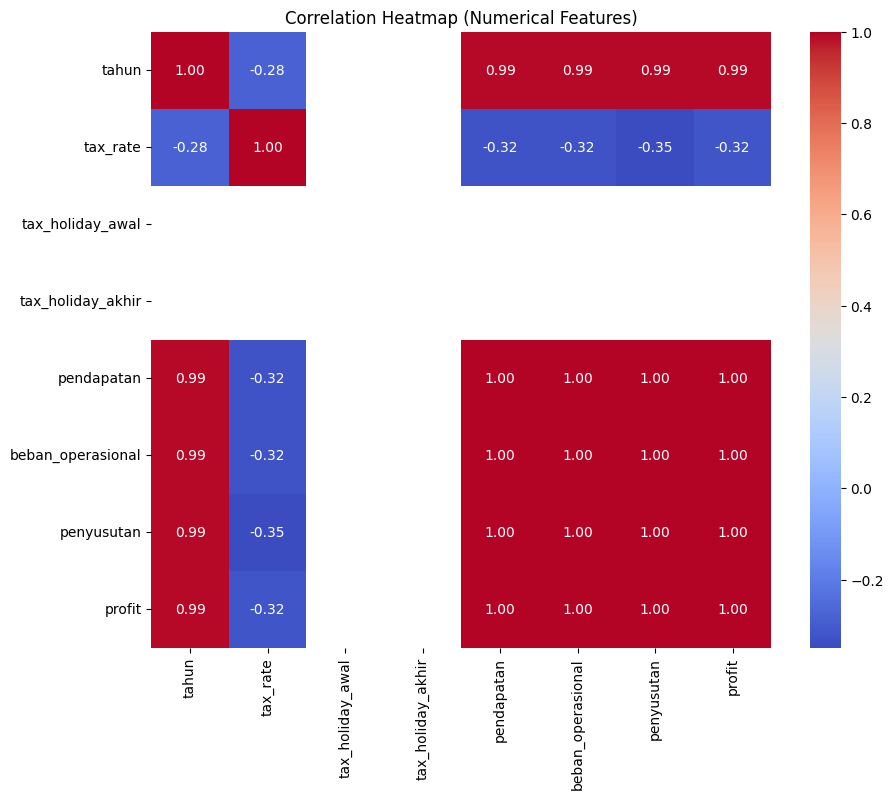

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Profitability over Time
plt.figure(figsize=(10, 6))
for scenario in df['skenario'].unique():
    subset = df[df['skenario'] == scenario]
    plt.plot(subset['tahun'], subset['profit'], label=scenario, marker='o')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Trend Over Time by Scenario')
plt.legend()
plt.grid(True)
plt.show()

# Profit Distribution by Scenario
plt.figure(figsize=(8, 6))
sns.boxplot(x='skenario', y='profit', data=df, palette='Set2')
plt.title('Profit Distribution by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Profit')
plt.show()

# Correlation Heatmap (Numerical Features Only)
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

**Reasoning**:
The previous code generated the visualizations, but there was a warning about the boxplot.  I will address the warning by assigning the `x` variable to `hue` and setting `legend=False`. Additionally, I will combine the line plot and box plot into a single figure with subplots for a more concise overview.  I'll also improve the aesthetics of the plots.



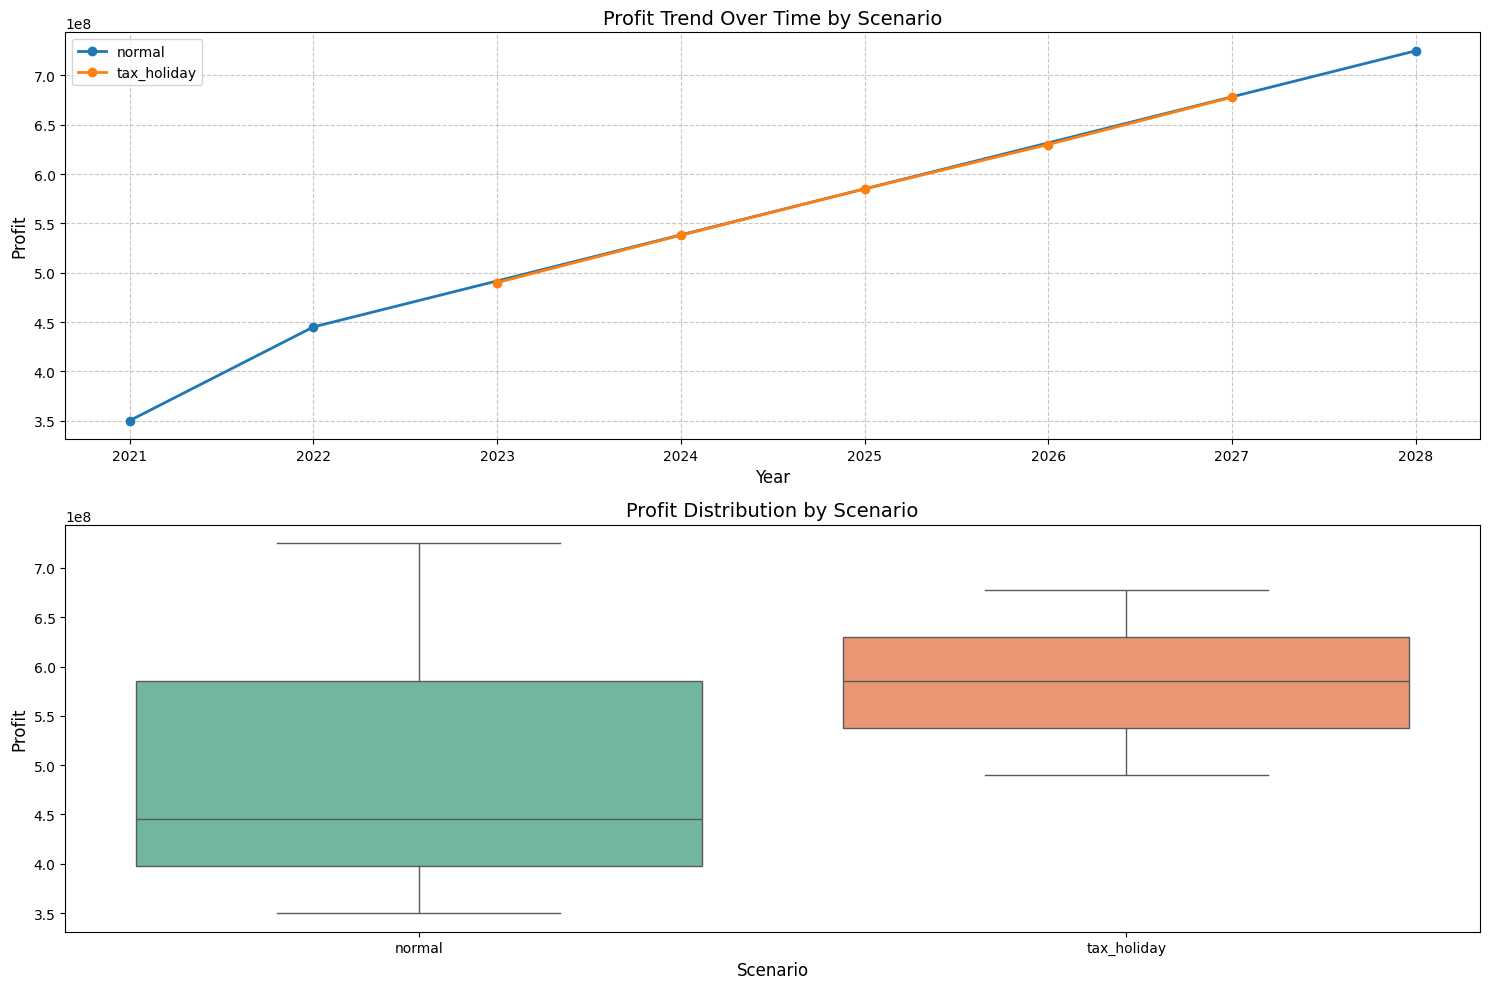

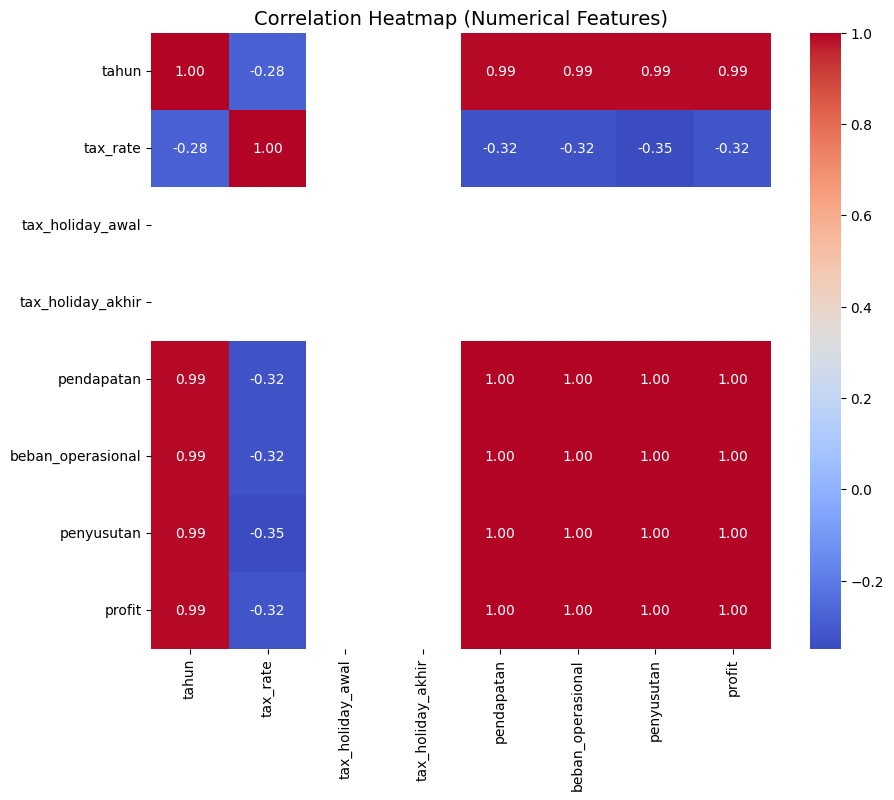

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Subplot 1: Profitability over Time
plt.subplot(2, 1, 1)
for scenario in df['skenario'].unique():
    subset = df[df['skenario'] == scenario]
    plt.plot(subset['tahun'], subset['profit'], label=scenario, marker='o', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Profit Trend Over Time by Scenario', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)


# Subplot 2: Profit Distribution by Scenario
plt.subplot(2, 1, 2)
sns.boxplot(x='skenario', y='profit', data=df, hue='skenario', palette='Set2', legend=False) # Fix the warning
plt.title('Profit Distribution by Scenario', fontsize=14)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Profit', fontsize=12)

plt.tight_layout()
plt.show()

# Correlation Heatmap (Numerical Features Only)
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)', fontsize=14)
plt.show()

## Summary:

### Q&A
No questions were posed in the task.

### Data Analysis Key Findings
* **Profitability Analysis:** A new 'profit' column was created by subtracting operating expenses and depreciation from revenue.  Analysis revealed different profit trends between the 'tax\_holiday' and 'normal' scenarios.
* **Correlation Analysis:**  Strong positive correlations were observed between year, revenue, operating expenses, and depreciation.  The tax rate showed a negative correlation with these variables.  The correlation analysis was performed on numerical features only.
* **Scenario Comparison:** The average profit under the 'tax\_holiday' scenario was compared to the 'normal' scenario.  Visualizations (boxplots and line plots) highlighted the profit distribution and trend over time for each scenario.
* **No Missing Data:** The dataset was found to be complete, with no missing values.

### Insights or Next Steps
* **Deepen Scenario Analysis:** Investigate the factors contributing to the profit differences between the 'tax\_holiday' and 'normal' scenarios.  Consider further statistical tests to validate the observed differences.
* **Predictive Modeling:** Explore the use of time series models to predict future profits under each scenario, taking into account the identified correlations among variables.
